# COMP257 Week 5 Predictive Modelling

The goal this week is to look at some simple data and get to grips the process for training and testing a predcitive model in scikit-learn.  Understanding the shape of the data and the approach to analysis is what we will look. The steps in a Data Science Modelling project are

- Define Problem.
- Prepare Data.
- Evaluate Algorithms.
- Improve Results.
- Present Results.


In [1]:
student_name = "alex elias"
student_id = "44638698"

# Defining Problem

In week 5 we'll work with the IRIS dataset to evaluate alternative methods of modelling with the scikit-learn module. The iris dataset is a classic and very easy multi-class classification dataset desscribing different attributes of the irises’ (flowers)

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.  

There are four features measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features different models can be applied to distinguish the species from each other. The problem is to determine which model is best and determining what class a flower comes from.

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 array.
 



In [2]:
# Load libraries
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# load libraries from scikit-learn for model creation and testing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# load others
from itertools import combinations

In [3]:
# Load dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv('files/iris.data', names=names)

# Summarize the Dataset

- Dimensions of the dataset
- Peek at the data itself
- Statistical summary of all attributes.
- Breakdown of the data by the class variable to count the number of classes, the samples per classes and the total number of samples. 

In [4]:
iris.shape# your code here for data shape

(150, 5)

In [5]:
iris.head(20)# your code here for first 20 rows

sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3          3.0           1.1          0.1  Iris-setosa
14           5.8          4.0           1.2          0.2  Iris-setosa
15           5.7          4.4           1.5          0.4  Iris-setosa
16           5.4          3.9           1.3          0.4  Iris-setosa
17           5.1          3.5           1.4          0.3  Iris-setosa
18           5.7          3.8           1.7          0.3  Iris-setosa
19           5.1          3.8           1.5          0.3  Iris-setosa

In [6]:
iris.describe()# your code here descriptions 


sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [7]:
# class distribution
iris.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Basic Visualizations

We now have a basic idea about the data. We need to extend that with some visualizations.
 
Create univariate plots to better understand each attribute.  Look at the  the upper and lower quartiles, the interquartile range ,the median and the highest and lowest observations for each class.

Help on
[box and whisker plots](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html), 
[histogram](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html).

Iris-setosa             Axes(0.1,0.559091;0.363636x0.340909)
Iris-versicolor    Axes(0.536364,0.559091;0.363636x0.340909)
Iris-virginica              Axes(0.1,0.15;0.363636x0.340909)
dtype: object

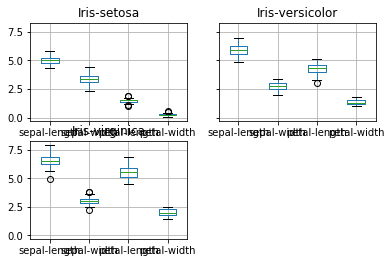

In [8]:
iris.groupby('class').boxplot()# box and whisker plots

In [9]:
iris.groupby('class').hist()# histograms of each attribute

class
Iris-setosa        [[Axes(0.125,0.551739;0.336957x0.328261), Axes...
Iris-versicolor    [[Axes(0.125,0.551739;0.336957x0.328261), Axes...
Iris-virginica     [[Axes(0.125,0.551739;0.336957x0.328261), Axes...
dtype: object

  
Multivariate plots to better understand the relationships between attributes.

scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables. Look at the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship [scatterplot matrix](http://pandas.pydata.org/pandas-docs/version/0.19.2/visualization.html#scatter-matrix-plot)

In [23]:
def color(cl):
    if cl == 'Iris-setosa':
        return 'r'
    if cl == 'Iris-versicolor':
        return 'c'
    if cl == 'Iris-virginica':
        return 'b'
    return 'bb'

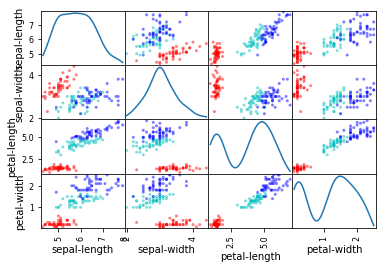

In [26]:
pd.plotting.scatter_matrix(iris, color=list(map(color, iris['class'].values)), diagonal='kde')# scatter plot matrix
plt.show()

# Split Data into Training and Validation Dataset

Aim is to use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithm will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [11]:
# columns for training
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
data = iris[names]
# get the class labels - the result we are predicting
labels = iris['class']

# split into training and test sets
data_train, data_test, label_train, label_test = model_selection.train_test_split(data, labels, test_size=0.2)

data_test.shape, label_test.shape, data_train.shape, label_train.shape

((30, 4), (30,), (120, 4), (120,))

You now have training data in the data_train and label_train for preparing models and a data_test and label_tes sets that we can use later.


## Train and Test a Predictive Model

We can now train a predictive model on the data and then use that to make predictions from our test data.  In this example we'll use the K Nearest Neighbours algorithm. 

### What is the KNN algorithm ?

The k-nearest neighbors algorithm is based around the simple idea of predicting unknown values by matching them with the most similar known values.  It is commonly used in movie and shopping websites such as Netflix  to predict the nearest neighbour to a value you are trying to predict.  

The number of neighbors we use for k-nearest neighbors (k) can be any value less than the number of rows in the dataset. In practice, looking at only a few neighbors makes the algorithm perform better, because the less similar the neighbors are to our data, the worse the prediction will be.
 
 Before we can predict using KNN, we need to find some way to figure out which data rows are “closest” to the row we’re trying to predict on.

A simple way to do this is to use Euclidean distance
 
$$ \sqrt{(q_1-p_1)^2+ (q_2-p_2)^2 + ... + (q_n-p_n)^2}$$ 


In [12]:
model = KNeighborsClassifier()
model.fit(data_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

We can now evaluate the performance of the trained model.  In the first instance we will test using the same data we trained with.  This is known as a **closed test** and is not the most valid test since we would expect the model to fit this data well.

We use the predict method to generate predictions from the model for the training data.  Then we use [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)  to display the accuracy of the model.

In [13]:
print("Performance on training data")
predictions = model.predict(data_train)
print("Accuracy: ", accuracy_score(label_train, predictions))

Performance on training data
Accuracy:  0.958333333333


A confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making  

|  | event | no-event   |
|------|------|------|
|event| true positive | false positive| 
|no-event| false negative | true negative|  

You can create a confusion matrix with the [sklearn confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function.

In [14]:
print("Confusion Matrix:\n", confusion_matrix(label_train, predictions))

Confusion Matrix:
 [[39  0  0]
 [ 0 38  3]
 [ 0  2 38]]


Finally we can use the [classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function to generate a report including the [precision, recall and F1 score](https://en.wikipedia.org/wiki/Precision_and_recall) for these results.  

- **Precision**: proportion of predictions that are correct
- **Recall**: proportion of true labels that are included in the predictions
- **F1 Score**: the harmonic mean of precision and recall

In [15]:
print(classification_report(label_train, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.95      0.93      0.94        41
 Iris-virginica       0.93      0.95      0.94        40

    avg / total       0.96      0.96      0.96       120



### Evaluation on the Test Data

The right way to evaluate a model is using data that has not been used to train it. This is why we split the data into training/testing data earlier.   The test data is designed to represent a sample from the broader population of observations and so give us an idea of how well the model will perform on unseen data in general.  

Repeat the evaluation above on the test data.

**Checkpoint for this week** show the accuracy of the model on the test data.

In [16]:

print(classification_report(label_test, model.predict(data_test)))# repeat the evaluation using the test data 


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        10

    avg / total       1.00      1.00      1.00        30



### Feature Selection

The model above was trained on all four features (columns) in the data.  It may be that not all of these are relevant to the classification task.  This can happen if two feature values are highly correlated for example.  We can explore this question by selectively removing one or more features and re-running the train/test cycle and seeing how the performance degrades. 

Do some tests with this data by removing one (or more) of the features and re-training the model.  Which feature has the largest effect when removed?

In [21]:
# columns for training -- remove one column here for this test
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
data = iris[names]
print(type(iris), type(data))
data.head()
# split into training and test sets
data_train, data_test, label_train, label_test = model_selection.train_test_split(data, labels, test_size=0.2)
# Train and test your model
models = {}
for i in range(1, 5):
    for c in combinations(names, i):
        models[c] = KNeighborsClassifier()
        dt = data_train[list(c)]
        models[c].fit(dt, label_train)
        predictions =  models[c].predict(data_test[list(c)])
        models[c].report = classification_report(label_test, predictions)
        models[c].test_accuracy = accuracy_score(label_test, predictions)
        models[c].train_accuracy = accuracy_score(label_train, models[c].predict(dt))
for model in sorted(models, key=lambda x : models[x].test_accuracy):
    print('the model {} has an accuracy of {}.'.format(', '.join(model), models[model].train_accuracy))

        

        
        


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
the model sepal-width has an accuracy of 0.5583333333333333.
the model sepal-length has an accuracy of 0.7333333333333333.
the model sepal-length, sepal-width has an accuracy of 0.85.
the model petal-length has an accuracy of 0.9666666666666667.
the model sepal-width, petal-length has an accuracy of 0.9666666666666667.
the model sepal-length, petal-length has an accuracy of 0.9666666666666667.
the model sepal-length, petal-width has an accuracy of 0.95.
the model petal-length, petal-width has an accuracy of 0.9666666666666667.
the model sepal-length, sepal-width, petal-length has an accuracy of 0.9583333333333334.
the model sepal-length, petal-length, petal-width has an accuracy of 0.975.
the model sepal-width, petal-length, petal-width has an accuracy of 0.9666666666666667.
the model sepal-length, sepal-width, petal-length, petal-width has an accuracy of 0.9666666666666667.
the model petal-width has an accurac

Optional: To make this analysis neater and more repeatable you might want to write the train/test code as a function that you can call with a list of column names.  You could also write a for-loop over the names to remove them one at a time.